# Sales Analysis

In [108]:
import pandas as pd
import os

### Merging 12 Months of Sales Data into a single file

In [109]:
all_months_data = pd.DataFrame()
for file in os.listdir("./SalesData"):
    if(file.endswith(".csv")):
        data = pd.read_csv(f"SalesData/{file}")
        all_months_data = pd.concat([all_months_data,data],ignore_index=True)

all_months_data.to_csv("all_months_data.csv",index=False)


### Read in updated dataframe

In [110]:
big_data = pd.read_csv("all_months_data.csv")
big_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Clean up the data

In [135]:
big_data = big_data.dropna(how="all")
big_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


#### Finding 'Or' and deleting it

In [139]:
big_data = big_data[big_data["Order Date"].str[:2] != "Or"]
big_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


#### Convert Price Each and Quantity Ordered columns into Integer and Float types

In [151]:
big_data["Quantity Ordered"] = pd.to_numeric(big_data["Quantity Ordered"]) #Converts to integer
big_data["Price Each"] = pd.to_numeric(big_data["Price Each"]) #Converts to float

#### Add Month Column 

In [140]:
big_data["Month"] = big_data["Order Date"].str[0:2].astype('int32')
big_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Add Sales Column

In [152]:
big_data["Sales"] = big_data["Quantity Ordered"] * big_data["Price Each"]
big_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


#### Add city column

In [196]:
def get_city(address):
    return address.split(",")[1]
def get_state(address):
    return address.split(" ")[-2]

big_data["City"] = big_data["Purchase Address"].apply(lambda x:get_city(x)+" "+get_state(x))
big_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


### What was the best month for sales? How was earned that month?

In [165]:
selected_columns = big_data[["Month","Quantity Ordered","Price Each","Sales"]]

In [175]:
month_sales_data = selected_columns.groupby("Month").sum()
month_sales_data

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


In [172]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Months')

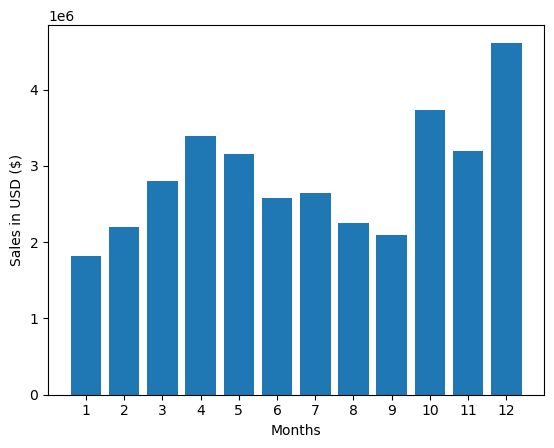

In [183]:
months = range(1,13)
plt.bar(months,month_sales_data["Sales"])
plt.xticks(months)
plt.ylabel("Sales in USD ($)")
plt.xlabel("Months")

### What city had the highest number of sales

In [262]:
city_sales_data = big_data.groupby("City").sum(numeric_only=True)
city_sales_data

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
City,,,,,,
Atlanta GA,16602,2779908.20,104794,2795498.58,214264,442932
Austin TX,11153,1809873.61,69829,1819581.75,141946,289060
Boston MA,22528,3637409.77,141112,3661642.01,288225,590442
Dallas TX,16730,2752627.82,104620,2767975.40,214390,435155
Los Angeles CA,33289,5421435.23,208325,5452570.80,427444,866638
New York City NY,27932,4635370.83,175741,4664317.43,357696,733598
Portland ME,2750,447189.25,17144,449758.27,35211,72856
Portland OR,11303,1860558.22,70621,1870732.34,144421,295533
San Francisco CA,50239,8211461.74,315520,8262203.91,643265,1319477


Text(0.5, 0, 'City Names')

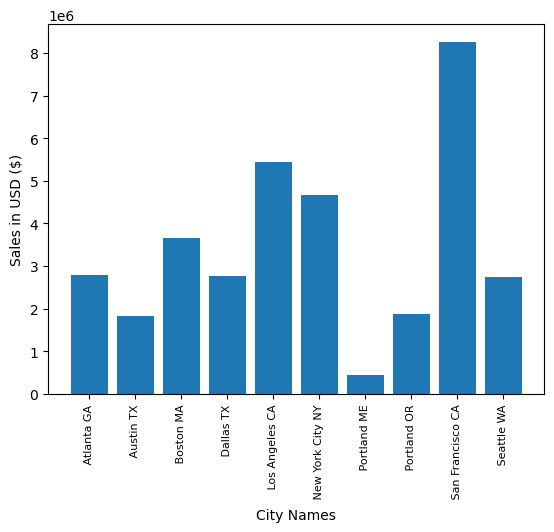

In [212]:
cities = [city for city,df in big_data.groupby("City")]
#cities = big_data["City"].unique() doing this will make the plotting be wrong as the x values are orderred differently than the y-values.

plt.bar(cities,city_sales_data["Sales"])
plt.xticks(cities,rotation="vertical",size=8)
plt.ylabel("Sales in USD ($)")
plt.xlabel("City Names")

### What time should we display advertisements to maximize likelihood of customer's buying product?

In [215]:
big_data["Order Date"] = pd.to_datetime(big_data["Order Date"])

C:\Users\samsa\AppData\Local\Temp\ipykernel_31788\2905042371.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  big_data["Order Date"] = pd.to_datetime(big_data["Order Date"])


In [218]:
big_data["Hour"] = big_data["Order Date"].dt.hour
big_data["Minute"] = big_data["Order Date"].dt.minute
big_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


Text(0, 0.5, 'Sales Count')

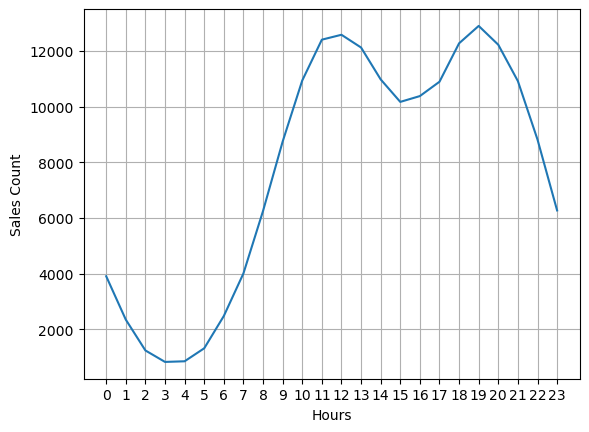

In [224]:
hours = [hour for hour,df in big_data.groupby("Hour")]
hour_sales_data = big_data.groupby("Hour").count()
plt.plot(hours,hour_sales_data["Sales"])
plt.xticks(hours)
plt.grid()
plt.xlabel("Hours")
plt.ylabel("Sales Count")

### What product are most often sold together

In [243]:
orders_df = big_data[big_data["Order ID"].duplicated(keep=False)]
orders_df["Grouped"] = orders_df.groupby("Order ID")["Product"].transform(lambda x: ','.join(x))
orders_df = orders_df[["Order ID", "Grouped"]].drop_duplicates()
orders_df.head()

C:\Users\samsa\AppData\Local\Temp\ipykernel_31788\1409389447.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_df["Grouped"] = orders_df.groupby("Order ID")["Product"].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [246]:
from itertools import combinations
from collections import Counter

count=Counter()

for row in orders_df["Grouped"]:
    row_list=row.split(",")
    count.update(Counter(combinations(row_list,2))) # 2 Items that were sold together
for key,value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### What product sold the most? Why do you think it sold the most?

In [249]:
big_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


In [256]:
dropped_ordered_date = big_data.drop("Order Date",axis=1)
product_sales_data = dropped_ordered_date.groupby("Product")
product_sales_data.sum(numeric_only=True)

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
Product,,,,,,
20in Monitor,4129,451068.99,29336,454148.71,58764,122252
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916,184331
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540,219948
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076,183480
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342,609039
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332,612113
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304,455570
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445,392603
Flatscreen TV,4819,1440000.00,34224,1445700.00,68815,142789


Text(0, 0.5, 'Quantity Ordered')

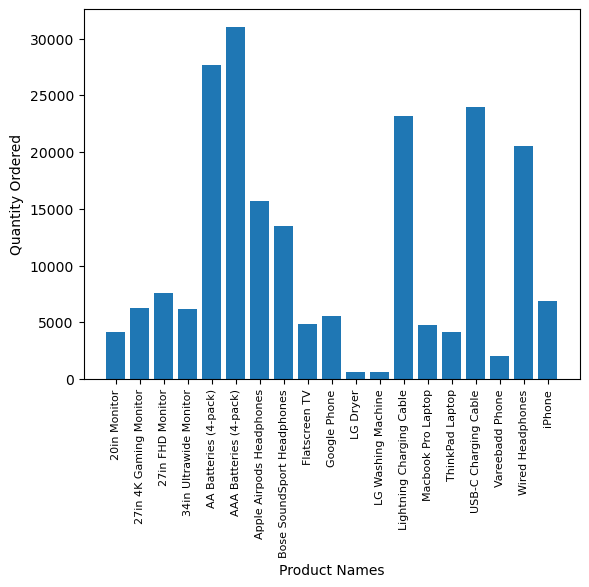

In [261]:
products = [product for product,df in product_sales_data]
quantity_ordered = product_sales_data.sum(numeric_only=True)["Quantity Ordered"]
plt.bar(products,quantity_ordered)
plt.xticks(products,rotation="vertical",size=8)
plt.xlabel("Product Names")
plt.ylabel("Quantity Ordered")

C:\Users\samsa\AppData\Local\Temp\ipykernel_31788\1972242161.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products,rotation="vertical", size=8)


Text(0, 0.5, 'Price ($)')

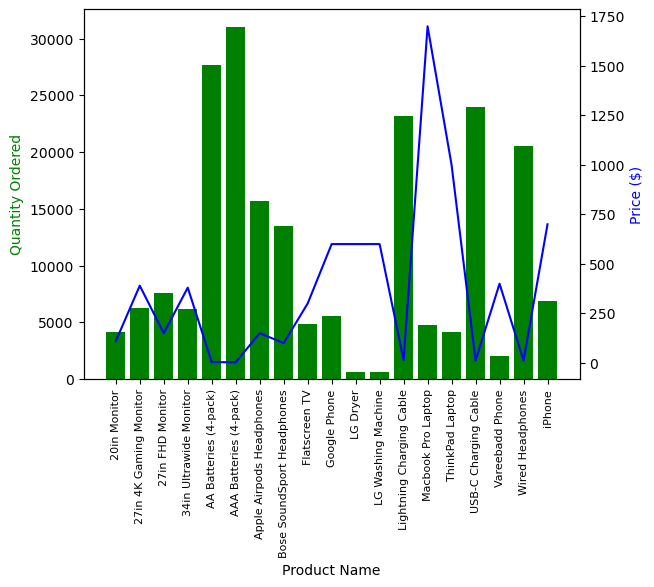

In [274]:
prices = big_data.groupby("Product").mean(numeric_only=True)["Price Each"]
fig,ax1 = plt.subplots()

ax2=ax1.twinx()
ax1.bar(products,quantity_ordered,color="g")
ax2.plot(products,prices,color="b")
ax1.set_xticklabels(products,rotation="vertical", size=8)
ax1.set_xlabel("Product Name")
ax1.set_ylabel("Quantity Ordered",color="g")
ax2.set_ylabel("Price ($)", color="b")
